In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
INF = 2147483647
def parse_gpu_result(path):
    with open(path, 'r') as fp:
        s = fp.read()
    if 'Processing time' not in s:
        return INF
    s = s[s.find('Processing time'):]
    s = s.split('\n')[0].strip()
    s = s.split(':')[1]
    return float(s[:-2])

(36895.34, 4)


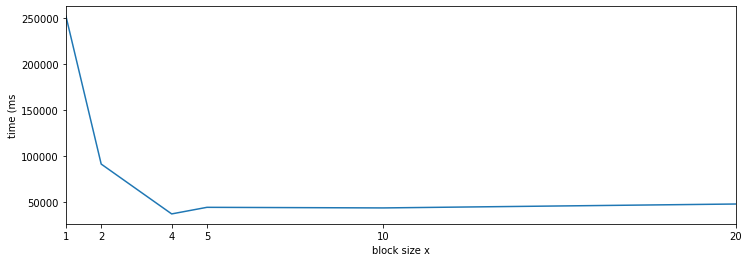

In [3]:
tick, val = [], []
mi = (INF, 0)
for i in range(1, 23):
    t = parse_gpu_result(f'../results/gpu1_{i}')
    if t == INF:
        continue
    tick.append(i)
    val.append(t)
    mi = min(mi, (t, i))
print(mi)

plt.figure(figsize=(12,4))
plt.xlim(min(tick), max(tick))
plt.xticks(tick)
plots = plt.plot(tick, val)
plt.xlabel('block size x')
plt.ylabel('time (ms')
plt.savefig('gpu1.pdf')

(48740.585, 10)


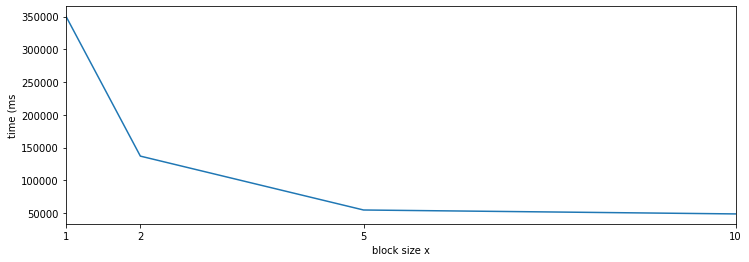

In [4]:
tick, val = [], []
mi = (INF, 0)
for i in range(1, 23):
    t = parse_gpu_result(f'../results/gpu2_{i}')
    if t == INF:
        continue
    tick.append(i)
    val.append(t)
    mi = min(mi, (t, i))
print(mi)

plt.figure(figsize=(12,4))
plt.xlim(min(tick), max(tick))
plt.xticks(tick)
plots = plt.plot(tick, val)
plt.xlabel('block size x')
plt.ylabel('time (ms')
plt.savefig('gpu2.pdf')

In [5]:
def parse_result(path):
    with open(path, 'r') as fp:
        s = fp.read()
    
    E_exact, M_exact = s.strip().split('\n')[-1].split()
    E_exact = float(E_exact.split('=')[1])
    M_exact = float(M_exact.split('=')[1])

    s = s[:s.find('Processing time')].strip()
    s = s.split('\n')[-10:]
    E, M = [], []
    for ln in s:
        ln = ln.split('\t')
        E.append(float(ln[0]))
        M.append(float(ln[1]))
    return E, M, E_exact, M_exact

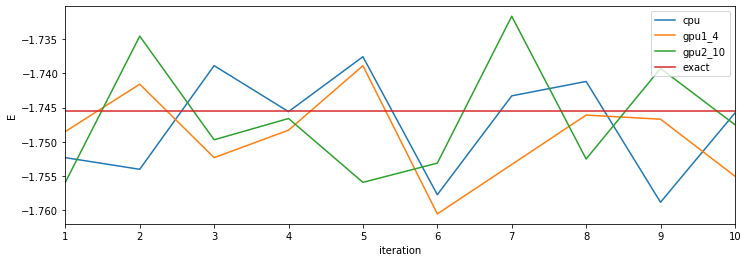

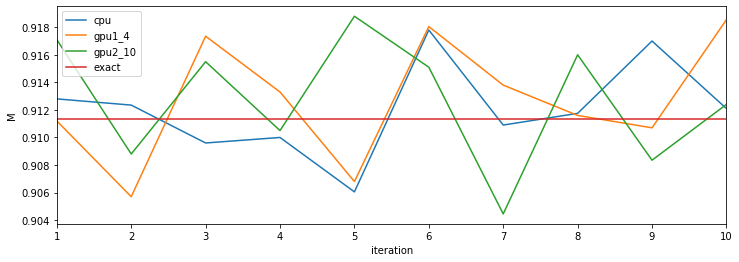

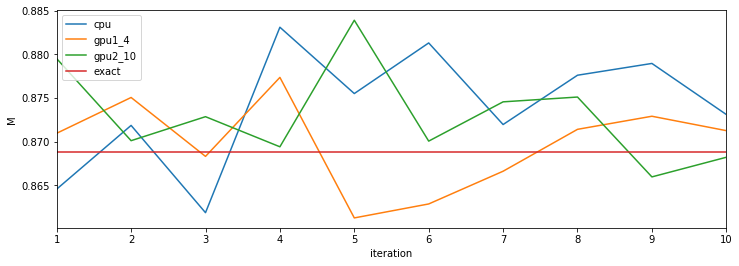

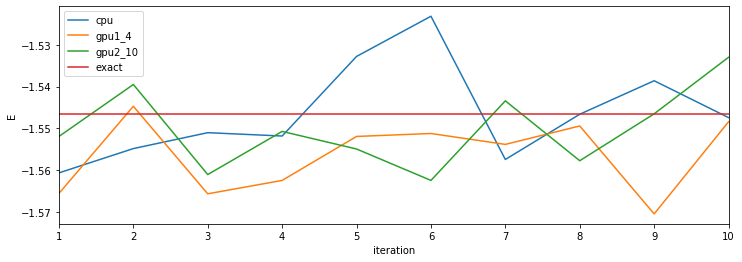

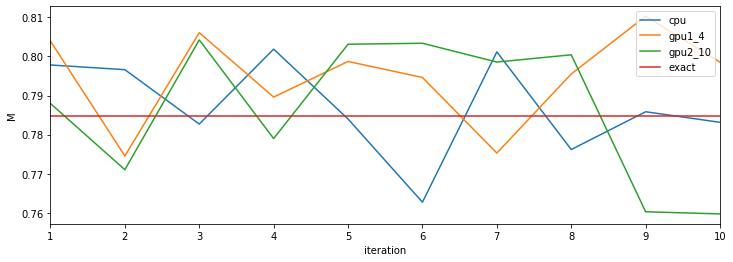

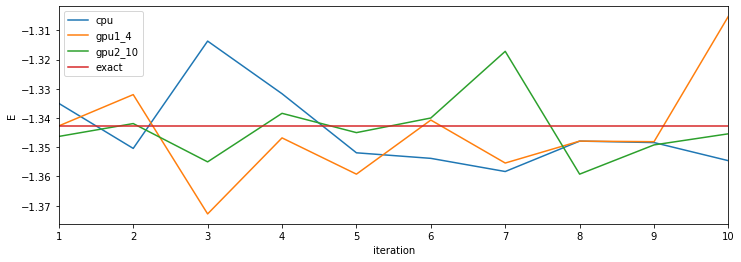

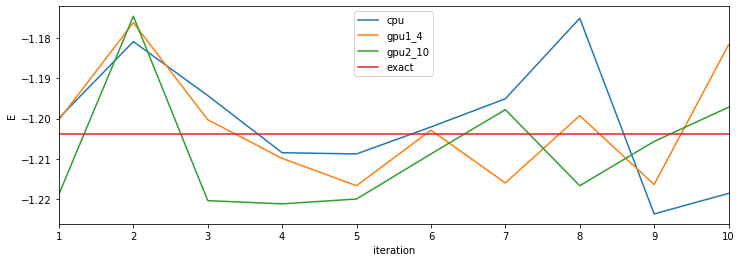

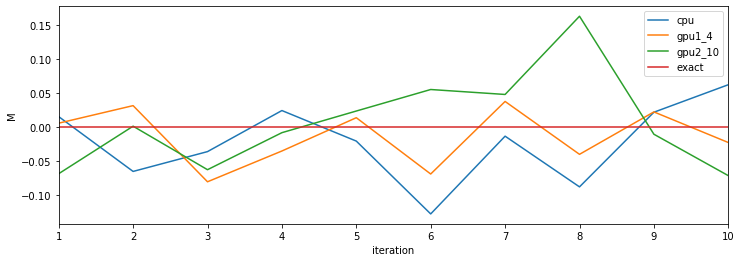

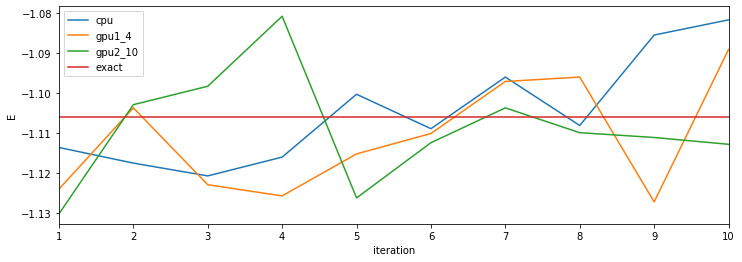

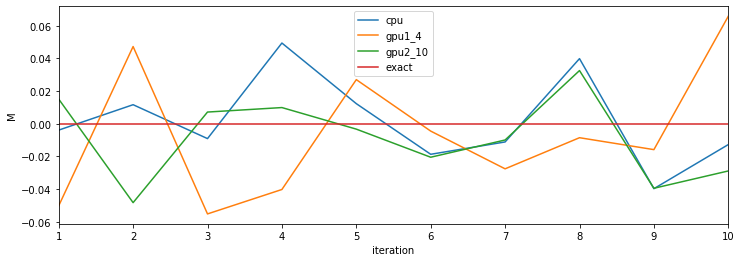

In [6]:
devices = ['cpu', 'gpu1_4', 'gpu2_10']
tick = list(range(1, 11))

for i in range(6):
    val_M, val_E = [], []
    for d in devices:
        E, M, E_exact, M_exact = parse_result(f'../results/{d}_{i}')
        val_M.append(M)
        val_E.append(E)
    val_M.append([M_exact] * 10)
    val_E.append([E_exact] * 10)
    
    val_M = list(zip(*val_M))
    val_E = list(zip(*val_E))

    plt.figure(figsize=(12,4))
    plt.xlim(min(tick), max(tick))
    plt.xticks(tick)
    plots = plt.plot(tick, val_E)
    plt.legend(plots, devices + ['exact'], loc='best')
    plt.xlabel('iteration')
    plt.ylabel('E')
    plt.savefig(f'E_2.{i}.pdf')

    plt.figure(figsize=(12,4))
    plt.xlim(min(tick), max(tick))
    plt.xticks(tick)
    plots = plt.plot(tick, val_M)
    plt.legend(plots, devices + ['exact'], loc='best')
    plt.xlabel('iteration')
    plt.ylabel('M')
    plt.savefig(f'M_2.{i}.pdf')


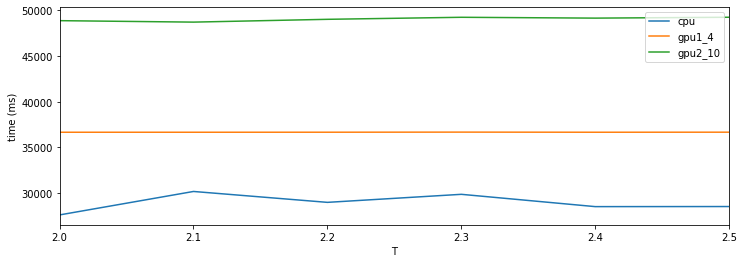

In [7]:
devices = ['cpu', 'gpu1_4', 'gpu2_10']
tick, times = [], []

for i in range(6):
    times.append([])
    tick.append(2+i/10)
    for d in devices:
        t = parse_gpu_result(f'../results/{d}_{i}')
        times[-1].append(t)

plt.figure(figsize=(12,4))
plt.xlim(min(tick), max(tick))
plt.xticks(tick)
plots = plt.plot(tick, times)
plt.legend(plots, devices, loc='best')
plt.xlabel('T')
plt.ylabel('time (ms)')
plt.savefig('times.pdf')